In [213]:
import math
import matplotlib.pyplot as plt
import keras
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping




df=pd.read_csv("C:/Users/hzb79/Downloads/TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [214]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [215]:
#the lag=1
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i:i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [216]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 4s 37ms/step - loss: nan
Epoch 2/100
24/24 [==============================] - 1s 37ms/step - loss: nan
Epoch 3/100
24/24 [==============================] - 1s 37ms/step - loss: nan
Epoch 4/100
24/24 [==============================] - 1s 37ms/step - loss: nan
Epoch 5/100
24/24 [==============================] - 1s 36ms/step - loss: nan
Epoch 6/100
24/24 [==============================] - 1s 36ms/step - loss: nan
Epoch 7/100
24/24 [==============================] - 1s 37ms/step - loss: nan
Epoch 8/100
24/24 [==============================] - 1s 37ms/step - loss: nan
Epoch 9/100
24/24 [==============================] - 1s 37ms/step - loss: nan
Epoch 10/100
24/24 [==============================] - 1s 37ms/step - loss: nan
Epoch 11/100
24/24 [==============================] - 1s 36ms/step - loss: nan
Epoch 12/100
24/24 [==============================] - 1s 36ms/step - loss: nan
Epoch 13/100
24/24 [==============================] - 1s 36ms

In [217]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [218]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

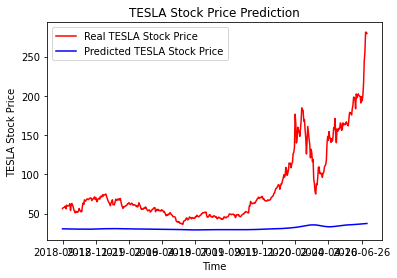

In [219]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [232]:
#change to 7 Days Time Lags
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output;7 days time lag
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i-6, 0])
    y_train.append(training_set_scaled[i-6:i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 4s 34ms/step - loss: 0.0700
Epoch 2/100
24/24 [==============================] - 1s 35ms/step - loss: 0.0150
Epoch 3/100
24/24 [==============================] - 1s 35ms/step - loss: 0.0151
Epoch 4/100
24/24 [==============================] - 1s 34ms/step - loss: 0.0153
Epoch 5/100
24/24 [==============================] - 1s 33ms/step - loss: 0.0128
Epoch 6/100
24/24 [==============================] - 1s 34ms/step - loss: 0.0135
Epoch 7/100
24/24 [==============================] - 1s 34ms/step - loss: 0.0130
Epoch 8/100
24/24 [==============================] - 1s 35ms/step - loss: 0.0131
Epoch 9/100
24/24 [==============================] - 1s 36ms/step - loss: 0.0128
Epoch 10/100
24/24 [==============================] - 1s 34ms/step - loss: 0.0132
Epoch 11/100
24/24 [==============================] - 1s 33ms/step - loss: 0.0124
Epoch 12/100
24/24 [==============================] - 1s 33ms/step - loss: 0.0112
Epoch 13/100
24/24 [=====

(459, 54, 1)


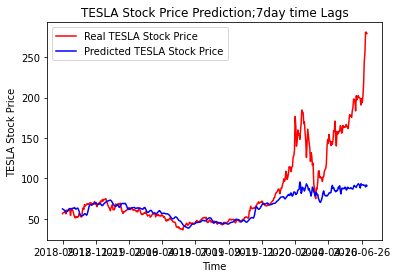

In [233]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i-6, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction;7day time Lags')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [234]:
#change to 14 Days Time Lags
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output，14 days time Lags
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i-13, 0])
    y_train.append(training_set_scaled[i-13:i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 4s 30ms/step - loss: 0.0554
Epoch 2/100
24/24 [==============================] - 1s 30ms/step - loss: 0.0184
Epoch 3/100
24/24 [==============================] - 1s 31ms/step - loss: 0.0172
Epoch 4/100
24/24 [==============================] - 1s 31ms/step - loss: 0.0149
Epoch 5/100
24/24 [==============================] - 1s 30ms/step - loss: 0.0144
Epoch 6/100
24/24 [==============================] - 1s 30ms/step - loss: 0.0153
Epoch 7/100
24/24 [==============================] - 1s 30ms/step - loss: 0.0157
Epoch 8/100
24/24 [==============================] - 1s 31ms/step - loss: 0.0142
Epoch 9/100
24/24 [==============================] - 1s 31ms/step - loss: 0.0140
Epoch 10/100
24/24 [==============================] - 1s 31ms/step - loss: 0.0143
Epoch 11/100
24/24 [==============================] - 1s 31ms/step - loss: 0.0132
Epoch 12/100
24/24 [==============================] - 1s 31ms/step - loss: 0.0133
Epoch 13/100
24/24 [=====

(459, 47, 1)


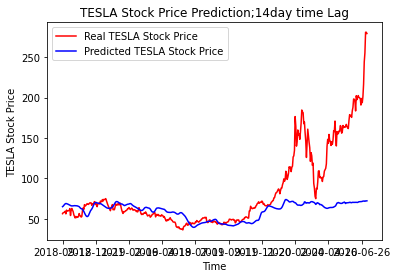

In [235]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i-13, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction;14day time Lag')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [236]:
# Six LSTM layer
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output;1 days time lag
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a forth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 6s 56ms/step - loss: 0.0737
Epoch 2/100
24/24 [==============================] - 1s 56ms/step - loss: 0.0217
Epoch 3/100
24/24 [==============================] - 1s 56ms/step - loss: 0.0173
Epoch 4/100
24/24 [==============================] - 1s 56ms/step - loss: 0.0164
Epoch 5/100
24/24 [==============================] - 1s 56ms/step - loss: 0.0143
Epoch 6/100
24/24 [==============================] - 1s 57ms/step - loss: 0.0145
Epoch 7/100
24/24 [==============================] - 1s 56ms/step - loss: 0.0147
Epoch 8/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0153
Epoch 9/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0153
Epoch 10/100
24/24 [==============================] - 1s 57ms/step - loss: 0.0134
Epoch 11/100
24/24 [==============================] - 1s 57ms/step - loss: 0.0121
Epoch 12/100
24/24 [==============================] - 1s 56ms/step - loss: 0.0129
Epoch 13/100
24/24 [=====

(459, 60, 1)


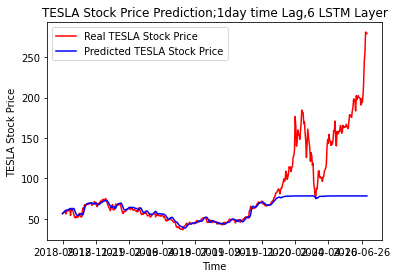

In [237]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction;1day time Lag,6 LSTM Layer')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [238]:
#Try three LSTM layer
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output;1 days time lag
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 3s 28ms/step - loss: 0.0632
Epoch 2/100
24/24 [==============================] - 1s 28ms/step - loss: 0.0140
Epoch 3/100
24/24 [==============================] - 1s 28ms/step - loss: 0.0120
Epoch 4/100
24/24 [==============================] - 1s 28ms/step - loss: 0.0111
Epoch 5/100
24/24 [==============================] - 1s 28ms/step - loss: 0.0094
Epoch 6/100
24/24 [==============================] - 1s 28ms/step - loss: 0.0096
Epoch 7/100
24/24 [==============================] - 1s 28ms/step - loss: 0.0104
Epoch 8/100
24/24 [==============================] - 1s 28ms/step - loss: 0.0091
Epoch 9/100
24/24 [==============================] - 1s 28ms/step - loss: 0.0086
Epoch 10/100
24/24 [==============================] - 1s 28ms/step - loss: 0.0081
Epoch 11/100
24/24 [==============================] - 1s 28ms/step - loss: 0.0073
Epoch 12/100
24/24 [==============================] - 1s 28ms/step - loss: 0.0094
Epoch 13/100
24/24 [=====

(459, 60, 1)


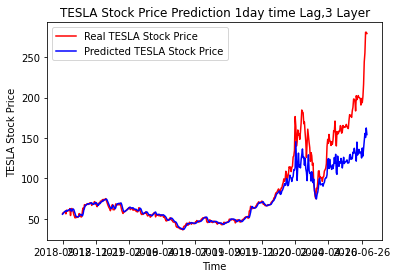

In [239]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction 1day time Lag,3 Layer')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [240]:
dfpre=pd.read_csv("C:/Users/hzb79/Downloads/pre.csv")

In [241]:
#do the predict of 
dataset_pre = dfpre.iloc[:60, 1:2]
dataset_testadd = dfpre.iloc[60:, 1:2]
dataset_total = pd.concat((dataset_pre, dataset_testadd), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_testadd)- 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_testadd = []
for i in range(60, 99):
    X_testadd.append(inputs[i-60:i, 0])
X_testadd = np.array(X_testadd)
X_testadd = np.reshape(X_testadd, (X_testadd.shape[0], X_testadd.shape[1], 1))
print(X_testadd.shape)

(39, 60, 1)


In [242]:
predicted_stock_price = model.predict(X_testadd)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

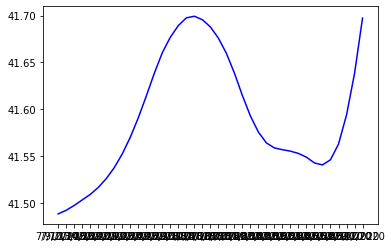

In [230]:
plt.plot(dfpre.loc[:38, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
